<a href="https://colab.research.google.com/github/ilx-prof/MyPyton-test/blob/master/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B8_%D0%B8%D1%85%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%22base_math_ter_ver_p2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Теория вероятности часть 2

## Распределения и их функции плотности

Задача 1

Непрерывная случайная величина X задана функцией плотности распределения:
$$f(x) =\left\{\begin{matrix}
0 &, if x\leq -\frac{\pi }{2}  \\ b*cos(x)
 &, if -\frac{\pi }{2} < x< \frac{\pi }{2}  \\ 0
 &, if x \geq  \frac{\pi }{2}
\end{matrix}\right.$$
Найти коэффициент b , Вычислить $P(0 \leq x \leq  \frac{\pi }{4})$

In [ ]:
# Используя свойство PDF: несобственный интеграл от - бесконечности до + бесконечности равен строго 1
# интеграл(от -inf до -pi/2) от 0 + интеграл(от -pi/2 до pi/2) от b * cos(x) + интеграл(от pi/2 до +inf) от 0 = 1
# интеграл(от -pi/2 до pi/2) от b * cos(x)  = 1 или b * интеграл(от -pi/2 до pi/2) cos(x) =1
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(lambda x: np.cos(x), -np.pi/2, np.pi/2)[0] # lambda x: np.cos(x) = > cos(x)dx
интеграл -inf/+inf b*cos(x) =  1
print(result)
print(1/result)

2.0
0.5


In [ ]:
P_0_pi_4 = 0.5 * integrate.quad(lambda x: np.cos(x), 0, np.pi/4)[0]
print(P_0_pi_4)

0.353553390593


Задача 2

Из пункта A ведётся стрельба из орудия вдоль прямой X. Предполагается, что дальность полёта распределена нормально с математическим ожиданием 1000 м и средним квадратическим отклонением 5 м. Определить сколько снарядов упадёт с перелётом от 5 до 70м.

In [ ]:
# Ищем P(1005<x<1070)
sigm = 5 
mu = 1000
#exp_ = - (((x-mu)**2)/float((2*(sigm**2))))
result = 1/float(sigm * np.sqrt(2*np.pi)) * integrate.quad(lambda x: np.exp(- (((x-mu)**2)/float((2*(sigm**2))))), 1005, 1070)[0]
result

0.15865525393145652

In [ ]:
# P(a < x < b) = P (x < b) - P(x < a) F(a,b) = F(b) - F(a)
from scipy.stats import norm
norm(loc=1000, scale=5).cdf(1070) - norm(1000,5).cdf(1005)

0.15865525393145707

In [ ]:
# Семплируем из распределения
for i in range(10):
  print(norm(loc=1000, scale=5).rvs())

1009.3880412101148
998.7915293097844
1006.518141004114
996.2924344197902
995.1647996491802
994.3129022767587
999.7648309100875
993.846651106398
998.89235914903
1005.9442920857368


Задача 3


Диаметр подшипников, изготовленных на заводе, представляет собой случайную величину, распределенную нормально с математическим ожиданием 1.8 см и средним квадратическим отклонением 0.075 см. Найти вероятность того, что размер наугад взятого подшипника колеблется от 1.7 до 1.85 см.

In [ ]:
# Ищем P(1005<x<1070) 
sigm = 0.075  
mu = 1.8
#exp_ = - (((x-mu)**2)/float((2*(sigm**2))))
result = 1/float(sigm * np.sqrt(2*np.pi)) * integrate.quad(lambda x: np.exp(- (((x-mu)**2)/float((2*(sigm**2))))), 1.7, 1.85)[0]
print(result)

0.656296242727


In [ ]:
# С использованием библиотеки scipy
norm(loc=mu, scale=sigm).cdf(1.85) - norm(mu,sigm).cdf(1.7)

0.6562962427272097

Задача 4

Непрерывная случайная величина X имеет одинаковую плотность распредления A на промежутке (-1,3) и нулевую плотнотсь вне этого промежутка, найти A, мат ожидание и дисперсию

In [ ]:
# Так как случайная величина имеет константную плотность распределения на заданном промежутке и 0 вне его, перед нами равномерное распределение
a=-1
b=3
A = 1/float(b-a)
E = (a+b)/2.
D = (b-a)**2 /12.
print("Плотность распределния: {}".format(A))
print("Мат ожидание: {}".format(E))
print("Дисперсия: {}".format(D))

Плотность распределния: 0.25
Мат ожидание: 1.0
Дисперсия: 1.33333333333


Задача 5

Цена деления шкалы измерительного прибора равна 0.2. Показания прибора округляются до ближайшего целого деления. Считая, что погрешности округлений распределены равномерно, найти вероятность того, что при очередном измерении она не превзойдёт 0.03.

In [ ]:
# 1. Найдем PDF (плотность вероятности)
a=0
b=0.2
A = 1/float(b-a)
print("Плотность распределния: {}".format(A)) 

Плотность распределния: 5.0


In [ ]:
# Когда погрешность округления до ближайшего деления не превзойдёт 0.03?
# , когда стрелка остановится не далее чем на 0.03 от левого деления справа или не далее чем на 0.03 от правого деления слева. 
# Теперь найдем CDF (вероятность) погрешности для обоих интервалов 
p1 = integrate.quad(lambda x: A, 0, 0.03)[0]
p2 = integrate.quad(lambda x: A, b-0.03, b)[0]

P = p1+p2
print("Искомая вероятность: {}".format(P)) 

Искомая вероятность: 0.3


In [ ]:
from scipy.stats import uniform
# Используем готовую библиотеку scipy
p1 = uniform(0,0.2).cdf(0.03) - uniform(0,0.2).cdf(0)
p2 = uniform(0,0.2).cdf(b) - uniform(0,0.2).cdf(b-0.03)
P = p1+p2
print("Искомая вероятность: {}".format(P)) 

Искомая вероятность: 0.3


Задача 6

Найти вероятность появления Орла а)0 б)1 и в) 3 раза в 5 бросках монеты

In [ ]:
# Для вычисления мы сразу воспользуемся готовой билиотекой
from scipy.stats import binom
n = 5
p = 0.5
binomal = binom(n,p)
print("Искомая вероятность a): {}".format(binomal.pmf(0))) 
print("Искомая вероятность б): {}".format(binomal.pmf(1))) 
print("Искомая вероятность в): {}".format(binomal.pmf(3))) 

Искомая вероятность a): 0.03125
Искомая вероятность б): 0.15625
Искомая вероятность в): 0.3125


Задача 7

В новом микрорайоне поставлено 15000 кодовых замков на входных дверях домов. Вероятность выхода из строя одного замка в течение месяца равна 0.0003. Найти вероятность того, что за месяц откажет ровно 3 замка.

In [ ]:
# Вычисления по прямой формуле биномального распределения будут ресурсозатратны из-за большого количества испытаний и маленькой вероятности, 
# вместо этого воспользуемся формулой Пуассона
from scipy.stats import poisson
n = 15000
p = 0.0003
mu = n*p
pois = poisson(mu=mu)
print("Искомая вероятность : {}".format(pois.pmf(3))) 

Искомая вероятность : 0.168717884925


In [ ]:
# Теперь сравним с Оригинальными значениями
n = 15000
p = 0.0003
binomal = binom(n,p)
print("Искомая вероятность в): {}".format(binomal.pmf(3))) 

Искомая вероятность в): 0.168722101045


Задача 8

Звонки в диспетчерскую такси представляет собой простой пуассоновский поток  со средней интенсивностью 50 вызовов в час. Найти вероятность того, что: а) за 1 мин. поступит 2-3 звонка, б) в течение пяти минут будет хотя бы один звонок.


In [ ]:
# Задаем распределение и свойства
from scipy.stats import poisson

mu = 50/60. #  интенсивность звонков в минуту
pois = poisson(mu=mu)
# Применяем теорему о сложении вероятностей
p1 = pois.pmf(2) # За минуту поступит 2 звонка
p2 = pois.pmf(3) # За минуту поступит 3 звонка
print("Искомая вероятность а): {}".format(p1+p2)) 

# Вычисляем интенсивность звонков в  5 минут
mu = (50/60.) * 5
pois = poisson(mu=mu)
# Применяем свойство : полная группа вероятностей = 1
p0 = pois.pmf(0) # Вычислим вероятность того что за 5 минут не поступит ни одного звонка
print("Искомая вероятность б): {}".format(1-p0))  # На основе упомянутого свойства найдем вероятноть противоположного события: поступит хотябы один звонок

Искомая вероятность а): 0.192819421213
Искомая вероятность б): 0.984496146401


Задача 9

Интенсивность звонков в колцентре составляет 50 звонков в час. Какая вероятность того, что между звонками пройдет по крайней мере 4 минуты?

In [ ]:
lambda_ = 50/60. # 1.5 звонков в минуту
E  =  1/float(lambda_) # Среднее время ожидания звонка
pmf =  integrate.quad(lambda x: (E)*np.exp(-E*x), 4, np.inf)[0]
print("Искомая вероятность (классический метод): {}".format(pmf))


Искомая вероятность (классический метод): 0.00822974704902


## Квантили, перцентили и моменты

In [ ]:
# Для вычисления моментов удобней всего использовать готовые бибилиотеки

Задача 10

Найти а)Среднее, Дисперсию, скошенность и куртозис б) 0.1 и 0.7 перцентили для нормального распределения со среднем = 0.5 и стандартным отклонением = 1

In [ ]:
mu = 0.5
std = 1.
nor_d = norm(mu,std)
mean, var, skew, kurt = nor_d.stats(moments='mvsk')
print("Среднее: {}".format(mean))
print("Вариация: {}".format(var))
print("Скошенность: {}".format(skew))
print("Куртозис: {}".format(kurt))

Среднее: 0.5
Вариация: 1.0
Скошенность: 0.0
Куртозис: 0.0


In [ ]:
print("Перцентиль 0.1: {}".format(nor_d.ppf(0.1)))
print("Перцентиль 0.7: {}".format(nor_d.ppf(0.7)))

Перцентиль 0.1: -0.781551565545
Перцентиль 0.7: 1.02440051271


## Визуализация распределений

In [ ]:
from numpy.random import normal
# Задаем распределение
mu = 0.5
sigma = 1
n = 10
# Генерируем 10 случайных точек из распределения
sample = normal(mu, sigma, n)
print(sample)

[ 2.03778672  2.50460345  1.6288376   1.33951093  0.67297941  1.02557589
  0.43740108  2.40196394  0.69432965 -0.51437686]


Middle 95% between 40.2 and 59.8


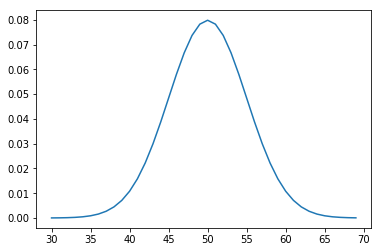

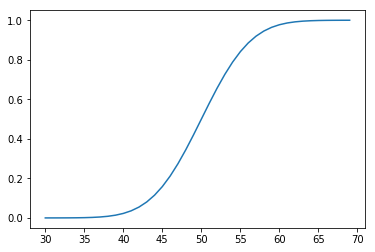

In [ ]:
from matplotlib import pyplot
mu = 50
sigma = 5
# Задаем распределение
dist = norm(mu, sigma)

#  интервал для 95% вероятности
low_end = dist.ppf(0.025)
high_end = dist.ppf(0.975)
print('Middle 95%% between %.1f and %.1f' % (low_end, high_end))
#  pdf
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()
#  cdf
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()

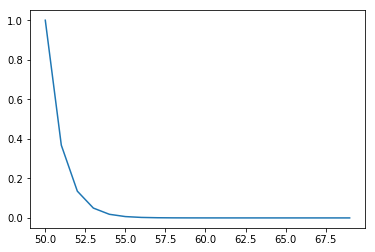

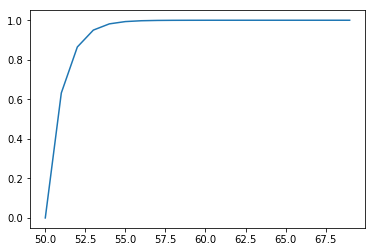

In [ ]:
# Задаем распределение и его параметры
beta = 50
dist = expon(beta)
#  pdf
values = [value for value in range(50, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()
#  cdf
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()